In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../src")

In [2]:
from data import describe_file

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['font.size'] = 12

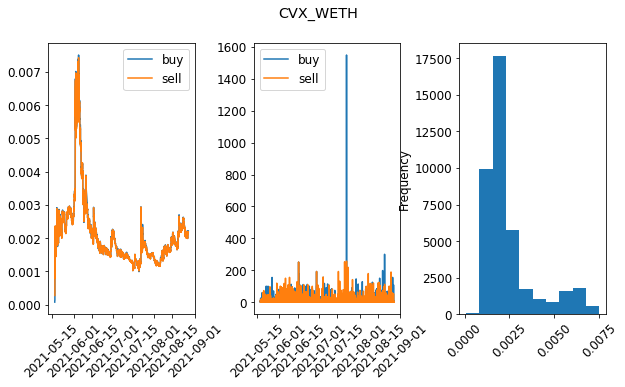

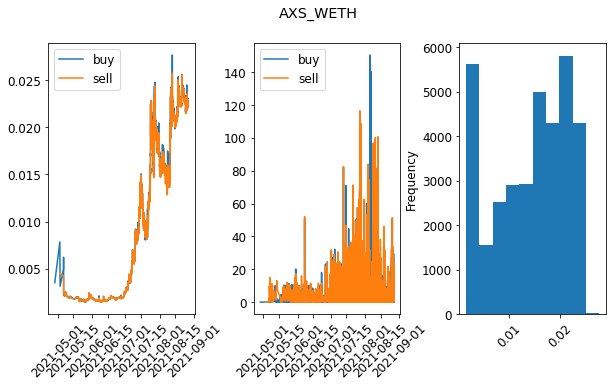

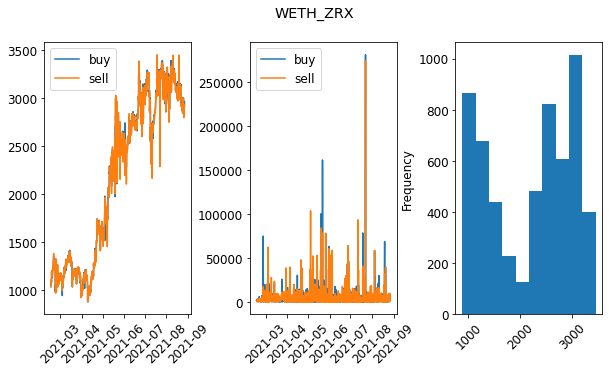

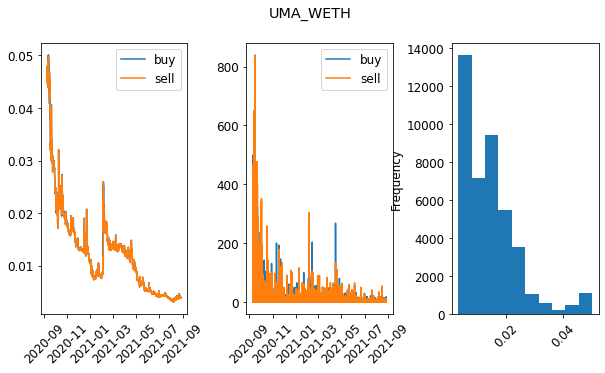

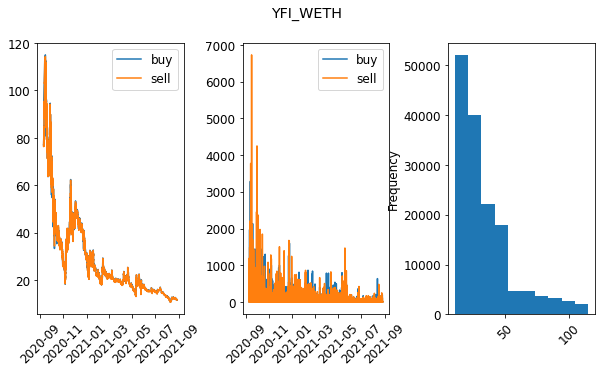

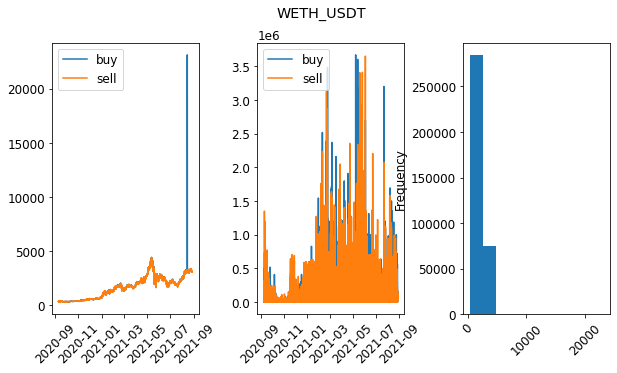

In [6]:
data_dir = "../trades_on_sushiswap"
for filename in os.listdir(data_dir):
    describe_file(data_dir, filename)

### How can we use volume to predict price?

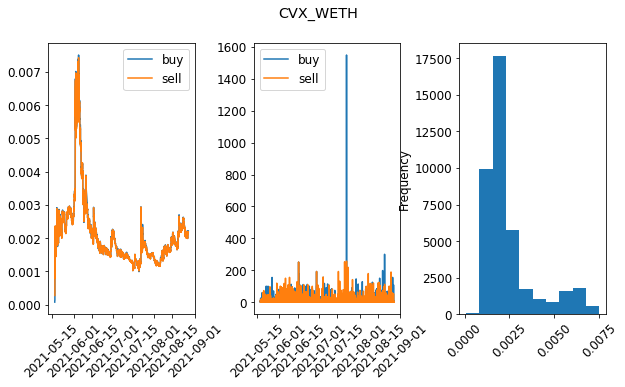

In [8]:
df = describe_file(data_dir, filename="CVX_WETH.csv")

Assumption: price depends on the previous timesteps volume value

In [9]:
df[df.isBid == True].corr(method='spearman')

,isBid,price,volume
isBid,NaN,NaN,NaN
price,NaN,1.00000,0.02146
volume,NaN,0.02146,1.00000


In [10]:
df[df.isBid == False].corr(method='spearman')

,isBid,price,volume
isBid,NaN,NaN,NaN
price,NaN,1.00000,0.10721
volume,NaN,0.10721,1.00000


In [11]:
data_dir, filename = "../trades_on_sushiswap", "CVX_WETH.csv"
df = pd.read_csv(os.path.join(data_dir, filename))
df.timestamp = pd.to_datetime(df.timestamp, format='%Y-%m-%dT%H:%M:%S.000Z')
df = df.set_index("timestamp").sort_index()
df.head()

,isBid,price,volume
timestamp,,,
2021-05-17 10:27:19,True,0.000075,0.05
2021-05-17 10:31:27,True,0.000084,0.07
2021-05-17 10:34:51,True,0.000098,0.10
2021-05-17 10:36:55,True,0.000115,0.10
2021-05-17 13:02:58,True,0.000129,0.05


In [12]:
(df.index.max()-df.index.min()) # 14 weeks

Timedelta('101 days 13:26:29')

### Signal distribution

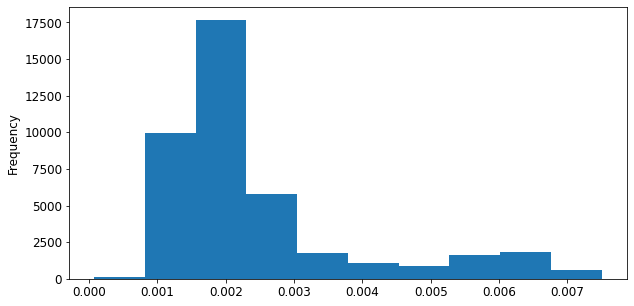

In [13]:
df.price.plot(kind='hist');